In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Problem Statement

ABC is a car rental company based out of Bangalore. It rents cars for both in and out stations at affordable prices. The users can rent different types of cars like Sedans, Hatchbacks, SUVs and MUVs, Minivans and so on.

In recent times, the demand for cars is on the rise. As a result, the company would like to tackle the problem of supply and demand. The ultimate goal of the company is to strike the balance between the supply and demand inorder to meet the user expectations. 

The company has collected the details of each rental. Based on the past data, the company would like to forecast the demand of car rentals on an hourly basis. 

## Table of Content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__
    
* __Step 5: Building Model__
    
* __How to Make a Submission?__
* __Guidelines for Final Submission__

### Step 1: Importing the Relevant Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import calendar

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2: Data Inspection

In [47]:
test = pd.read_csv("/content/drive/MyDrive/Jobathon/22 4 22/test_6QvDdzb.csv")
train = pd.read_csv("/content/drive/MyDrive/Jobathon/22 4 22/train_E1GspfA.csv")

In [48]:
train.shape,test.shape

((18247, 3), (7650, 2))

In [50]:
test.isnull().sum()

date    0
hour    0
dtype: int64

In [51]:
train.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [52]:
test.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [53]:
train.describe()

,hour,demand
count,18247.000000,18247.000000
mean,12.614731,73.991451
std,6.544963,41.678988
min,0.000000,1.000000
25%,8.000000,43.000000
50%,13.000000,71.000000
75%,18.000000,98.000000
max,23.000000,379.000000


In [54]:
train.tail()

,date,hour,demand
18242,2021-02-28,19,95
18243,2021-02-28,20,88
18244,2021-02-28,21,39
18245,2021-02-28,22,104
18246,2021-02-28,23,85


### Step 3: Data Cleaning

Does not have NAN values.

In [49]:
train.isnull().sum()

date      0
hour      0
demand    0
dtype: int64

In [55]:
def findDay(date):
    born = datetime.datetime.strptime(date, '%d %m %Y').weekday()
    return (calendar.day_name[born])

In [56]:
# Driver program
date = '23 04 2022'
print(findDay(date))

Saturday


### Step 4: Exploratory Data Analysis

Extracting months days and weekday name from date in pandas

In [57]:
#train['year'] = pd.to_datetime(train['date']).dt.year
train['month'] = pd.to_datetime(train['date']).dt.month
train['day'] = pd.to_datetime(train['date']).dt.day
train['war'] = pd.to_datetime(train['date']).dt.weekday

In [15]:
train.head()

,date,hour,demand,month,day,war
0,2018-08-18,9,91,8,18,5
1,2018-08-18,10,21,8,18,5
2,2018-08-18,13,23,8,18,5
3,2018-08-18,14,104,8,18,5
4,2018-08-18,15,81,8,18,5


In [16]:
train.tail()

,date,hour,demand,month,day,war
18242,2021-02-28,19,95,2,28,6
18243,2021-02-28,20,88,2,28,6
18244,2021-02-28,21,39,2,28,6
18245,2021-02-28,22,104,2,28,6
18246,2021-02-28,23,85,2,28,6


### Get seasons



Try to extract season but not succeed

In [ ]:
month = train['month']

# Get seasons
spring = range(3, 5)
summer = range(6, 8)
fall = range(9, 11)
# winter = everything else


season=[]

for _ in range(len(month)):
    if any(x == spring for x in month):
       season.append(2) # spring 
    elif any(x == summer for x in month):
        season.append(3) # summer
    elif any(x == fall for x in month):
        season.append(4) # fall
    else:
        season.append(1) # winter

        
train['Season'] = season

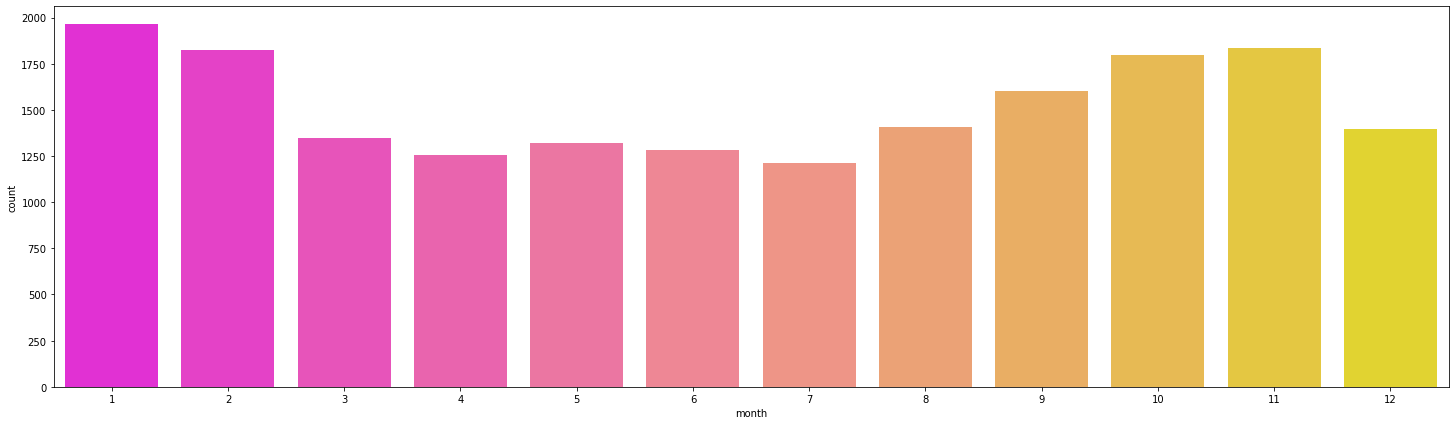

In [93]:
import seaborn as sns
plt.figure(figsize=(25,7))
sns.countplot('month',data=train ,palette='spring')

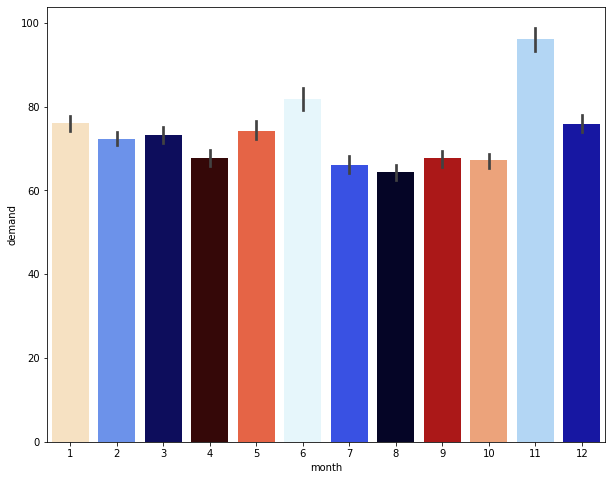

In [97]:
plt.figure(figsize=(10,8))
sns.barplot(y='demand',x='month',data=train,palette='flag')

### Step 5: Building Model

In [59]:
# Seperate Features and Target
X= train.drop(columns = ['demand','date'], axis=1)
y= train['demand']

In [19]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [76]:
from xgboost import XGBRegressor

In [77]:

from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [78]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),RandomForestRegressor(), SVR(), XGBRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor','Random Forest', "SVR" ,"XGB"]

rmse_list_train = []
rmse_list_test = []


In [79]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    y_pred1 = model.predict(X_valid)
    MSE= metrics.mean_squared_error(y_train,y_pred)
    MSE1= metrics.mean_squared_error(y_valid,y_pred1)
    rmse = np.sqrt(MSE)
    rmse1 = np.sqrt(MSE1)
    rmse_list_train.append(rmse)
    rmse_list_test.append(rmse1)


[17:24:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [80]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE _train': rmse_list_train , 'RMSE _test': rmse_list_test})

# Error Evaluation

In [81]:
evaluation

,Model,RMSE _train,RMSE _test
0,Linear Regression,40.915611,39.399281
1,Ridge Regression,40.915611,39.399277
2,Lasso Regression,40.965783,39.453446
3,K Neighbors Regressor,29.089382,35.330751
4,Decision Tree Regressor,0.000000,45.180566
5,Random Forest,12.749267,33.747487
6,SVR,38.312349,36.952385
7,XGB,35.113092,34.250739


In [ ]:
from sklearn.model_selection import GridSearchCV

random_forest_tuning = RandomForestRegressor(random_state = 24)
param_grid = {
   'n_estimators': [25, 30, 50],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [2,3,4],
   'criterion' :['mse', 'mae']
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5)
GSCV.fit(X_train,y_train)
GSCV.best_params_ 

In [ ]:

y_pred = random_forest.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 

Scaling for SVN

In [18]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 

X = sc_X.fit_transform(X) 


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf','poly']}
 
grid = GridSearchCV(svm.SVR(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.003 total time=  12.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.002 total time=  12.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.006 total time=  11.9s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.004 total time=  11.8s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.001 total time=  13.1s


# Deep Neural Network
Tried but dataset is small.

In [20]:
import tensorflow as tf
from tensorflow import keras

In [37]:
modeld = keras.Sequential([
    keras.layers.Dense(8, input_dim=4, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dropout(0.5),
        keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
      keras.layers.Dense(8, activation='relu'),
    keras.layers.Dropout(0.5),
          keras.layers.Dense(4, activation='relu'),

    keras.layers.Dense(1, activation='relu')
])

modeld.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

modeld.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
457/457 [==============================] - 3s 4ms/step - loss: 5543.8999 - mean_squared_error: 5543.8999
Epoch 2/50
457/457 [==============================] - 2s 4ms/step - loss: 3730.0977 - mean_squared_error: 3730.0977
Epoch 3/50
457/457 [==============================] - 1s 3ms/step - loss: 2955.6970 - mean_squared_error: 2955.6970
Epoch 4/50
457/457 [==============================] - 1s 2ms/step - loss: 2711.3435 - mean_squared_error: 2711.3435
Epoch 5/50
457/457 [==============================] - 1s 2ms/step - loss: 2544.6619 - mean_squared_error: 2544.6619
Epoch 6/50
457/457 [==============================] - 1s 2ms/step - loss: 2433.5283 - mean_squared_error: 2433.5283
Epoch 7/50
457/457 [==============================] - 1s 2ms/step - loss: 2381.8687 - mean_squared_error: 2381.8687
Epoch 8/50
457/457 [==============================] - 1s 2ms/step - loss: 2296.3823 - mean_squared_error: 2296.3823
Epoch 9/50
457/457 [==============================] - 1s 2ms/step - loss

In [38]:
rmse_list = []
y_pred = modeld.predict(X_valid)
MSE= metrics.mean_squared_error(y_valid,y_pred)
rmse = np.sqrt(MSE)
rmse_list.append(MSE)

In [39]:
evaluation = pd.DataFrame({'Model': 'model',
                           'RMSE ': rmse_list})
evaluation

,Model,RMSE
0,model,1738.005957


In [40]:
#train['year'] = pd.to_datetime(train['date']).dt.year
test['month'] = pd.to_datetime(test['date']).dt.month
test['day'] = pd.to_datetime(test['date']).dt.day
test['war'] = pd.to_datetime(test['date']).dt.weekday
test.head()

,date,hour,month,day,war
0,2021-03-01,0,3,1,0
1,2021-03-01,1,3,1,0
2,2021-03-01,2,3,1,0
3,2021-03-01,3,3,1,0
4,2021-03-01,5,3,1,0


In [41]:
test = test.drop(columns = ['date'], axis=1)
# Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 

test = sc_X.fit_transform(test) 

In [42]:
final = modeld.predict(test)
final_df= pd.read_csv("/content/drive/MyDrive/Jobathon/22 4 22/test_6QvDdzb.csv")
final_df['demand'] = final
final_df

,date,hour,demand
0,2021-03-01,0,58.031487
1,2021-03-01,1,58.037346
2,2021-03-01,2,58.043198
3,2021-03-01,3,58.132454
4,2021-03-01,5,58.197678
...,...,...,...
7645,2022-03-28,19,57.555702
7646,2022-03-28,20,57.522156
7647,2022-03-28,21,57.510326
7648,2022-03-28,22,57.501785


In [65]:
test = test.drop(columns = ['date'], axis=1)

In [70]:
final = regr.predict(test)
final_df= pd.read_csv("/content/drive/MyDrive/Jobathon/22 4 22/test_6QvDdzb.csv")
final_df['demand'] = final
final_df

,date,hour,demand
0,2021-03-01,0,87.07
1,2021-03-01,1,51.96
2,2021-03-01,2,43.09
3,2021-03-01,3,45.30
4,2021-03-01,5,36.37
...,...,...,...
7645,2022-03-28,19,90.86
7646,2022-03-28,20,80.82
7647,2022-03-28,21,64.92
7648,2022-03-28,22,61.83


In [71]:
final_df.to_csv('final1.csv',index = False)

## Voting Regressor 
in this used RandomForestRegressor, XGBRegressor & KNeighborsRegresso

In [101]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
kn_rg = KNeighborsRegressor()
xgb_rg = XGBRegressor()
Random_rg = RandomForestRegressor(criterion= 'squared_error', max_depth=4, n_estimators=80)
voting_rg = VotingRegressor(estimators =[('kn', kn_rg), ('xgb',xgb_rg), ('rf', Random_rg)])
voting_rg.fit(X, y)

[18:12:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


VotingRegressor(estimators=[('kn', KNeighborsRegressor()),
                            ('xgb', XGBRegressor()),
                            ('rf',
                             RandomForestRegressor(max_depth=4,
                                                   n_estimators=80))])

In [102]:
final = voting_rg.predict(test)
final_df= pd.read_csv("/content/drive/MyDrive/Jobathon/22 4 22/test_6QvDdzb.csv")
final_df['demand'] = final
final_df

,date,hour,demand
0,2021-03-01,0,58.965998
1,2021-03-01,1,53.227276
2,2021-03-01,2,48.676745
3,2021-03-01,3,49.234663
4,2021-03-01,5,42.250204
...,...,...,...
7645,2022-03-28,19,81.310227
7646,2022-03-28,20,71.651719
7647,2022-03-28,21,65.292035
7648,2022-03-28,22,61.906587


In [103]:
final_df.to_csv('final3.csv',index = False)